In [6]:
import pandas as pd 
import numpy as np
import seaborn as sns
import re
import matplotlib.pyplot as plt

In [231]:
bestTopics = pd.read_csv('../data/bestPatentsPeTopic.csv',index_col='code')
bestTopics

,Unnamed: 0,title,pub_date,citations,abstract,class,year,abstract_processed,topic,class_topic,core,louvain,topiclouvain,GTcore
code,,,,,,,,,,,,,,
JP6239807B1,41,Method and system for behavior analysis of mob...,2017-11-29,"['KR101720930B1', 'CN106575327B', 'US9747430B2...",\n\n The computing device processor identifies...,G06,2017,\n\n the computing device processor identifies...,0,G06_0,2,5.0,5.0,5.0
US10104107B2,162,Methods and systems for behavior-specific actu...,2018-10-16,"['JP6140808B2', 'JP6188956B2', 'US9596257B2', ...",\nVarious embodiments include methods of evalu...,G06,2018,\nvarious embodiments include methods of evalu...,0,G06_0,2,5.0,5.0,5.0
US9910984B2,164,Methods and systems for on-device high-granula...,2018-03-06,"['US9779236B2', 'KR102160659B1', 'EP2836955B1'...",\nVarious aspects include methods and computin...,G06,2018,\nvarious aspects include methods and computin...,0,G06_0,2,5.0,5.0,5.0
US9330257B2,183,Adaptive observation of behavioral features on...,2016-05-03,"['US10015178B2', 'US10397262B2', 'TWI606360B',...","\nMethods, devices and systems for detecting s...",G06,2016,\nmethods devices and systems for detecting su...,0,G06_0,2,5.0,5.0,5.0
US9158604B1,184,Lightweight data-flow tracker for realtime beh...,2015-10-13,"['JP6235000B2', 'US20180300484A1', 'US20140201...",\nMethods and devices for detecting performanc...,G06,2015,\nmethods and devices for detecting performanc...,0,G06_0,2,5.0,5.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
EP3716111A1,6551,Computer-security violation detection using co...,2020-09-30,"['EP3111330B1', 'US10902117B1', 'JP6388875B2',...",\r\nEvent vectors can be determined for respec...,G06,2020,\r\nevent vectors can be determined for respec...,6,G06_6,2,2.0,91.0,3.0
US20200279225A1,7077,Email security analysis,2020-09-03,"['US20180152471A1', 'US10178115B2', 'US9501746...",\r\nThe technology described herein visibly de...,G06,2020,\r\nthe technology described herein visibly de...,6,G06_6,2,2.0,26.0,3.0
WO2018081016A1,7171,Multi-level security analysis and intermediate...,2018-05-03,"['US9501746B2', 'US8578051B2', 'US10581898B1',...",\r\nAn initial risk of an electronic message i...,G06,2018,\r\nan initial risk of an electronic message i...,6,G06_6,2,2.0,26.0,3.0


In [232]:
best = bestTopics
import networkx as nx
G = nx.read_graphml("../data/7topicsCores.graphml")
bestG = nx.Graph()

for code, patent in best.iterrows():
    if patent['citations'] != '[]': #citation is a string represetnation of a list 
        for l in str(patent['citations'][1:-1]).split(','):
            link = l.replace(" ","")[1:-1]
            if link in best.index and link!=code: 
                bestG.add_edge(code, str(link) )
print(len(bestG))
for node in bestG.nodes():
    for key in G.nodes[node].keys():
        bestG.nodes[node][key] = G.nodes[node][key]
        
nx.write_graphml(bestG,'../data/bestG.graphml')

430


In [233]:
for node in bestG.nodes():
    for key in G.nodes[node].keys():
        bestG.nodes[node][key] = G.nodes[node][key]
        
nx.write_graphml(bestG,'../data/bestG.graphml')

In [234]:
for t in range(7):
    print('\n\n Topic ',t,'\n')
    for title in best[best.topic==t]['title']: print(title)



 Topic  0 

Method and system for behavior analysis of mobile device behavior based on user persona information 
Methods and systems for behavior-specific actuation for real-time whitelisting 
Methods and systems for on-device high-granularity classification of device behaviors using multi-label models 
Adaptive observation of behavioral features on a mobile device 
Lightweight data-flow tracker for realtime behavioral analysis using control flow 
Methods and systems for side channel analysis detection and protection 
Automated behavioral and static analysis using an instrumented sandbox and machine learning classification for mobile security 
Secure behavior analysis over trusted execution environment 
Cloud based security monitoring using unsupervised pattern recognition and deep learning 
On-line behavioral analysis engine in mobile device with multiple analyzer model providers 
Framework for client cloud behavior analyzer 
Efficient on-device binary analysis for auto-generated be

In [235]:
best = bestTopics

corpus = []
for top in best['topic'].astype(int).unique():
    titles = ''
    for title in best[best.topic==top]['title']: 
        clean = re.sub(',',' ',title)
        clean = re.sub('\n','',clean)
        clean = clean.lower()
        titles+=clean
    corpus.append(titles)
corpus

['method and system for behavior analysis of mobile device behavior based on user persona information methods and systems for behavior-specific actuation for real-time whitelisting methods and systems for on-device high-granularity classification of device behaviors using multi-label models adaptive observation of behavioral features on a mobile device lightweight data-flow tracker for realtime behavioral analysis using control flow methods and systems for side channel analysis detection and protection automated behavioral and static analysis using an instrumented sandbox and machine learning classification for mobile security secure behavior analysis over trusted execution environment cloud based security monitoring using unsupervised pattern recognition and deep learning on-line behavioral analysis engine in mobile device with multiple analyzer model providers framework for client cloud behavior analyzer efficient on-device binary analysis for auto-generated behavioral models attack 

In [236]:

import nltk
from nltk.corpus import stopwords
stop = stopwords.words('english')

vocabulary = []
for top in corpus:
    for w in set(top.split()):
        if w not in stop:
            vocabulary.append(w)

vocabulary=list(set(vocabulary))

In [237]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline
import numpy as np


vectorizer = CountVectorizer(vocabulary=vocabulary)
transformer =  TfidfTransformer()
X1 = vectorizer.fit_transform(corpus)
X2 = transformer.fit_transform(X1)
feature_names = vectorizer.get_feature_names()

In [238]:
def print_top_words(idf, feature_names, n_top_words):
    #bestwords = [[] for t in range(X2.shape[0])]
    for topic in range(idf.shape[0]):
        bestwords[topic] = sorted([(w,idf[(topic,w)] )for w in range(idf.shape[1]) ], key = lambda item: item[1], reverse=True)
        print('\n Topic ',topic,' :  ')
        for w, score in bestwords[topic][:n_top_words]: 
            print(feature_names[w], end= ' ')

In [239]:
print_top_words(X2, feature_names,10)
        
#0 cyber security
#1 image vide
#2 
#3 comupter system


 Topic  0  :  
behavioral device analysis mobile models behavior system malware methods flow 
 Topic  1  :  
device system method detecting user users identity authentication remote electronic 
 Topic  2  :  
state processor methods data machine systems pattern engine recognition received 
 Topic  3  :  
system method kind warning image based device medium hologram code 
 Topic  4  :  
methods systems detecting files malware data security preventing loss applications 
 Topic  5  :  
security network system threat method cyber detection systems cybersecurity methods 
 Topic  6  :  
message security detection system malware electronic methods analysis exploit detecting 

In [240]:
len(feature_names)

904

## BEST LOUVAINS

In [217]:
bestLouvains = pd.read_csv('../data/bestPatentsPeLouvain.csv',index_col='code')
bestLouvains

,Unnamed: 0,title,pub_date,citations,abstract,class,year,abstract_processed,topic,class_topic,core,louvain,LCcore
code,,,,,,,,,,,,,
EP3410328A1,29,Method and system to distinguish between a hum...,2018-12-05,"['US9531710B2', 'US10032010B2', 'US10083304B2'...",\nA system and method to distinguish between a...,G06,2018,\na system and method to distinguish between a...,0,G06_0,2,0.0,8.0
US10032010B2,30,"System, device, and method of visual login and...",2018-07-24,"['US9071969B2', 'US10839065B2', 'US20190364019...","\nDevices, systems, and methods of detecting u...",G06,2018,\ndevices systems and methods of detecting use...,1,G06_1,2,0.0,8.0
US9547766B2,31,"Device, system, and method of detecting malici...",2017-01-17,"['US10230718B2', 'US10049209B2', 'US9071969B2'...","\nDevices, systems, and methods of detecting u...",G06,2017,\ndevices systems and methods of detecting use...,1,G06_1,2,0.0,8.0
US10740758B2,32,"Context-dependent authentication system, metho...",2020-08-11,"['US9531710B2', 'US10164985B2', 'US10002244B2'...",\nA method for authenticating a user using a u...,G06,2020,\na method for authenticating a user using a u...,6,G06_6,2,0.0,8.0
US10055560B2,35,"Device, method, and system of detecting multip...",2018-08-21,"['US10230718B2', 'US10049209B2', 'US9071969B2'...","\nDevices, systems, and methods of detecting u...",G06,2018,\ndevices systems and methods of detecting use...,1,G06_1,2,0.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
US20170177725A1,4570,Developing An Item Data Model For An Item,2017-06-22,"['US9990422B2', 'US9606970B2', 'US10180967B2',...","\r\nThe present invention extends to methods, ...",G06,2017,\r\nthe present invention extends to methods s...,2,G06_2,2,19.0,1.0
US10771424B2,4730,Usability and resource efficiency using commen...,2020-09-08,"['US9146986B2', 'US8918418B2', 'JP6568609B2', ...",\r\nTechniques for enhancing usability and ele...,H04,2020,\r\ntechniques for enhancing usability and ele...,0,H04_0,2,19.0,1.0
US20190259008A1,4746,System and Method of Indexing Websites Using C...,2019-08-22,"['EP2884440A1', 'KR101168705B1', 'US9654549B2'...",\r\nAn online index of websites that leverages...,G06,2019,\r\nan online index of websites that leverages...,5,G06_5,2,19.0,1.0


In [218]:
best = bestLouvains
best['louvain'] =best['louvain'].astype(int)
corpus = []
for top in best['louvain'].astype(int).unique():
    titles = ''
    for title in best[best.louvain==top]['title']: 
        clean = re.sub(',',' ',title)
        clean = re.sub('\n','',clean)
        clean = clean.lower()
        titles+=clean
    corpus.append(titles)
len(corpus)

28

In [219]:

import nltk
from nltk.corpus import stopwords
stop = stopwords.words('english')

vocabulary = []
for top in corpus:
    for w in set(top.split()):
        if w not in stop:
            vocabulary.append(w)

vocabulary=list(set(vocabulary))
len(vocabulary)

1303

In [220]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline
import numpy as np


vectorizer = CountVectorizer(vocabulary=vocabulary)
transformer =  TfidfTransformer()
X1 = vectorizer.fit_transform(corpus)
X2 = transformer.fit_transform(X1)
feature_names = vectorizer.get_feature_names()
X2.shape

(28, 1303)

In [230]:
def print_top_words(idf, feature_names, n_top_words):
    bestwords = [[] for t in range(idf.shape[0])]
    for community in range(idf.shape[0]):
        words = [(w,idf[(community,w)] )for w in range(idf.shape[1]) ]
        bestwords[community] = sorted(words, key = lambda item: item[1], reverse=True)
        print('\n Community ',community,' :  ')
        for w, score in bestwords[community][:n_top_words]: 
            print(feature_names[w], end= ' ')
            
print_top_words(X2, feature_names,10)


 Community  0  :  
device method system authentication detecting user users identity cyber bots 
 Community  1  :  
secure user profile exchange systems methods data information storage identity 
 Community  2  :  
security detection malware network threats detecting web dns computer system 
 Community  3  :  
arrangements methods payments smartphone employing mobile phone identifiers transactions devices 
 Community  4  :  
system warning method monitoring kind early intelligent based image camera 
 Community  5  :  
malware behavioral device mobile detection analysis learning behavior machine models 
 Community  6  :  
temporal gaming memory enhanced prizing platform spatial environment system implementing 
 Community  7  :  
systems methods detecting files loss malware computing security graphs correlation 
 Community  8  :  
industrial system control security systems cyber detection method physical network 
 Community  9  :  
emergency system response risk building analysis releva

In [165]:
for community in range(idf.shape[0]):
    for w in range(X2.shape[1]):
        try:
            words.append((w,X2[(community,w)]))
        except: print(community,w)
      

0 0
0 1
0 2
0 3
0 4
0 5
0 6
0 7
0 8
0 9
0 10
0 11
0 12
0 13
0 14
0 15
0 16
0 17
0 18
0 19
0 20
0 21
0 22
0 23
0 24
0 25
0 26
0 27
0 28
0 29
0 30
0 31
0 32
0 33
0 34
0 35
0 36
0 37
0 38
0 39
0 40
0 41
0 42
0 43
0 44
0 45
0 46
0 47
0 48
0 49
0 50
0 51
0 52
0 53
0 54
0 55
0 56
0 57
0 58
0 59
0 60
0 61
0 62
0 63
0 64
0 65
0 66
0 67
0 68
0 69
0 70
0 71
0 72
0 73
0 74
0 75
0 76
0 77
0 78
0 79
0 80
0 81
0 82
0 83
0 84
0 85
0 86
0 87
0 88
0 89
0 90
0 91
0 92
0 93
0 94
0 95
0 96
0 97
0 98
0 99
0 100
0 101
0 102
0 103
0 104
0 105
0 106
0 107
0 108
0 109
0 110
0 111
0 112
0 113
0 114
0 115
0 116
0 117
0 118
0 119
0 120
0 121
0 122
0 123
0 124
0 125
0 126
0 127
0 128
0 129
0 130
0 131
0 132
0 133
0 134
0 135
0 136
0 137
0 138
0 139
0 140
0 141
0 142
0 143
0 144
0 145
0 146
0 147
0 148
0 149
0 150
0 151
0 152
0 153
0 154
0 155
0 156
0 157
0 158
0 159
0 160
0 161
0 162
0 163
0 164
0 165
0 166
0 167
0 168
0 169
0 170
0 171
0 172
0 173
0 174
0 175
0 176
0 177
0 178
0 179
0 180
0 181
0 182
0 183
0 184


1 252
1 253
1 254
1 255
1 256
1 257
1 258
1 259
1 260
1 261
1 262
1 263
1 264
1 265
1 266
1 267
1 268
1 269
1 270
1 271
1 272
1 273
1 274
1 275
1 276
1 277
1 278
1 279
1 280
1 281
1 282
1 283
1 284
1 285
1 286
1 287
1 288
1 289
1 290
1 291
1 292
1 293
1 294
1 295
1 296
1 297
1 298
1 299
1 300
1 301
1 302
1 303
1 304
1 305
1 306
1 307
1 308
1 309
1 310
1 311
1 312
1 313
1 314
1 315
1 316
1 317
1 318
1 319
1 320
1 321
1 322
1 323
1 324
1 325
1 326
1 327
1 328
1 329
1 330
1 331
1 332
1 333
1 334
1 335
1 336
1 337
1 338
1 339
1 340
1 341
1 342
1 343
1 344
1 345
1 346
1 347
1 348
1 349
1 350
1 351
1 352
1 353
1 354
1 355
1 356
1 357
1 358
1 359
1 360
1 361
1 362
1 363
1 364
1 365
1 366
1 367
1 368
1 369
1 370
1 371
1 372
1 373
1 374
1 375
1 376
1 377
1 378
1 379
1 380
1 381
1 382
1 383
1 384
1 385
1 386
1 387
1 388
1 389
1 390
1 391
1 392
1 393
1 394
1 395
1 396
1 397
1 398
1 399
1 400
1 401
1 402
1 403
1 404
1 405
1 406
1 407
1 408
1 409
1 410
1 411
1 412
1 413
1 414
1 415
1 416
1 417
1 41

2 448
2 449
2 450
2 451
2 452
2 453
2 454
2 455
2 456
2 457
2 458
2 459
2 460
2 461
2 462
2 463
2 464
2 465
2 466
2 467
2 468
2 469
2 470
2 471
2 472
2 473
2 474
2 475
2 476
2 477
2 478
2 479
2 480
2 481
2 482
2 483
2 484
2 485
2 486
2 487
2 488
2 489
2 490
2 491
2 492
2 493
2 494
2 495
2 496
2 497
2 498
2 499
2 500
2 501
2 502
2 503
2 504
2 505
2 506
2 507
2 508
2 509
2 510
2 511
2 512
2 513
2 514
2 515
2 516
2 517
2 518
2 519
2 520
2 521
2 522
2 523
2 524
2 525
2 526
2 527
2 528
2 529
2 530
2 531
2 532
2 533
2 534
2 535
2 536
2 537
2 538
2 539
2 540
2 541
2 542
2 543
2 544
2 545
2 546
2 547
2 548
2 549
2 550
2 551
2 552
2 553
2 554
2 555
2 556
2 557
2 558
2 559
2 560
2 561
2 562
2 563
2 564
2 565
2 566
2 567
2 568
2 569
2 570
2 571
2 572
2 573
2 574
2 575
2 576
2 577
2 578
2 579
2 580
2 581
2 582
2 583
2 584
2 585
2 586
2 587
2 588
2 589
2 590
2 591
2 592
2 593
2 594
2 595
2 596
2 597
2 598
2 599
2 600
2 601
2 602
2 603
2 604
2 605
2 606
2 607
2 608
2 609
2 610
2 611
2 612
2 613
2 61

3 520
3 521
3 522
3 523
3 524
3 525
3 526
3 527
3 528
3 529
3 530
3 531
3 532
3 533
3 534
3 535
3 536
3 537
3 538
3 539
3 540
3 541
3 542
3 543
3 544
3 545
3 546
3 547
3 548
3 549
3 550
3 551
3 552
3 553
3 554
3 555
3 556
3 557
3 558
3 559
3 560
3 561
3 562
3 563
3 564
3 565
3 566
3 567
3 568
3 569
3 570
3 571
3 572
3 573
3 574
3 575
3 576
3 577
3 578
3 579
3 580
3 581
3 582
3 583
3 584
3 585
3 586
3 587
3 588
3 589
3 590
3 591
3 592
3 593
3 594
3 595
3 596
3 597
3 598
3 599
3 600
3 601
3 602
3 603
3 604
3 605
3 606
3 607
3 608
3 609
3 610
3 611
3 612
3 613
3 614
3 615
3 616
3 617
3 618
3 619
3 620
3 621
3 622
3 623
3 624
3 625
3 626
3 627
3 628
3 629
3 630
3 631
3 632
3 633
3 634
3 635
3 636
3 637
3 638
3 639
3 640
3 641
3 642
3 643
3 644
3 645
3 646
3 647
3 648
3 649
3 650
3 651
3 652
3 653
3 654
3 655
3 656
3 657
3 658
3 659
3 660
3 661
3 662
3 663
3 664
3 665
3 666
3 667
3 668
3 669
3 670
3 671
3 672
3 673
3 674
3 675
3 676
3 677
3 678
3 679
3 680
3 681
3 682
3 683
3 684
3 685
3 68

4 794
4 795
4 796
4 797
4 798
4 799
4 800
4 801
4 802
4 803
4 804
4 805
4 806
4 807
4 808
4 809
4 810
4 811
4 812
4 813
4 814
4 815
4 816
4 817
4 818
4 819
4 820
4 821
4 822
4 823
4 824
4 825
4 826
4 827
4 828
4 829
4 830
4 831
4 832
4 833
4 834
4 835
4 836
4 837
4 838
4 839
4 840
4 841
4 842
4 843
4 844
4 845
4 846
4 847
4 848
4 849
4 850
4 851
4 852
4 853
4 854
4 855
4 856
4 857
4 858
4 859
4 860
4 861
4 862
4 863
4 864
4 865
4 866
4 867
4 868
4 869
4 870
4 871
4 872
4 873
4 874
4 875
4 876
4 877
4 878
4 879
4 880
4 881
4 882
4 883
4 884
4 885
4 886
4 887
4 888
4 889
4 890
4 891
4 892
4 893
4 894
4 895
4 896
4 897
4 898
4 899
4 900
4 901
4 902
4 903
4 904
4 905
4 906
4 907
4 908
4 909
4 910
4 911
4 912
4 913
4 914
4 915
4 916
4 917
4 918
4 919
4 920
4 921
4 922
4 923
4 924
4 925
4 926
4 927
4 928
4 929
4 930
4 931
4 932
4 933
4 934
4 935
4 936
4 937
4 938
4 939
4 940
4 941
4 942
4 943
4 944
4 945
4 946
4 947
4 948
4 949
4 950
4 951
4 952
4 953
4 954
4 955
4 956
4 957
4 958
4 959
4 96

5 935
5 936
5 937
5 938
5 939
5 940
5 941
5 942
5 943
5 944
5 945
5 946
5 947
5 948
5 949
5 950
5 951
5 952
5 953
5 954
5 955
5 956
5 957
5 958
5 959
5 960
5 961
5 962
5 963
5 964
5 965
5 966
5 967
5 968
5 969
5 970
5 971
5 972
5 973
5 974
5 975
5 976
5 977
5 978
5 979
5 980
5 981
5 982
5 983
5 984
5 985
5 986
5 987
5 988
5 989
5 990
5 991
5 992
5 993
5 994
5 995
5 996
5 997
5 998
5 999
5 1000
5 1001
5 1002
5 1003
5 1004
5 1005
5 1006
5 1007
5 1008
5 1009
5 1010
5 1011
5 1012
5 1013
5 1014
5 1015
5 1016
5 1017
5 1018
5 1019
5 1020
5 1021
5 1022
5 1023
5 1024
5 1025
5 1026
5 1027
5 1028
5 1029
5 1030
5 1031
5 1032
5 1033
5 1034
5 1035
5 1036
5 1037
5 1038
5 1039
5 1040
5 1041
5 1042
5 1043
5 1044
5 1045
5 1046
5 1047
5 1048
5 1049
5 1050
5 1051
5 1052
5 1053
5 1054
5 1055
5 1056
5 1057
5 1058
5 1059
5 1060
5 1061
5 1062
5 1063
5 1064
5 1065
5 1066
5 1067
5 1068
5 1069
5 1070
5 1071
5 1072
5 1073
5 1074
5 1075
5 1076
5 1077
5 1078
5 1079
5 1080
5 1081
5 1082
5 1083
5 1084
5 1085
5 1086
5

6 1232
6 1233
6 1234
6 1235
6 1236
6 1237
6 1238
6 1239
6 1240
6 1241
6 1242
6 1243
6 1244
6 1245
6 1246
6 1247
6 1248
6 1249
6 1250
6 1251
6 1252
6 1253
6 1254
6 1255
6 1256
6 1257
6 1258
6 1259
6 1260
6 1261
6 1262
6 1263
6 1264
6 1265
6 1266
6 1267
6 1268
6 1269
6 1270
6 1271
6 1272
6 1273
6 1274
6 1275
6 1276
6 1277
6 1278
6 1279
6 1280
6 1281
6 1282
6 1283
6 1284
6 1285
6 1286
6 1287
6 1288
6 1289
6 1290
6 1291
6 1292
6 1293
6 1294
6 1295
6 1296
6 1297
6 1298
6 1299
6 1300
6 1301
6 1302
7 0
7 1
7 2
7 3
7 4
7 5
7 6
7 7
7 8
7 9
7 10
7 11
7 12
7 13
7 14
7 15
7 16
7 17
7 18
7 19
7 20
7 21
7 22
7 23
7 24
7 25
7 26
7 27
7 28
7 29
7 30
7 31
7 32
7 33
7 34
7 35
7 36
7 37
7 38
7 39
7 40
7 41
7 42
7 43
7 44
7 45
7 46
7 47
7 48
7 49
7 50
7 51
7 52
7 53
7 54
7 55
7 56
7 57
7 58
7 59
7 60
7 61
7 62
7 63
7 64
7 65
7 66
7 67
7 68
7 69
7 70
7 71
7 72
7 73
7 74
7 75
7 76
7 77
7 78
7 79
7 80
7 81
7 82
7 83
7 84
7 85
7 86
7 87
7 88
7 89
7 90
7 91
7 92
7 93
7 94
7 95
7 96
7 97
7 98
7 99
7 100
7 101
7

8 243
8 244
8 245
8 246
8 247
8 248
8 249
8 250
8 251
8 252
8 253
8 254
8 255
8 256
8 257
8 258
8 259
8 260
8 261
8 262
8 263
8 264
8 265
8 266
8 267
8 268
8 269
8 270
8 271
8 272
8 273
8 274
8 275
8 276
8 277
8 278
8 279
8 280
8 281
8 282
8 283
8 284
8 285
8 286
8 287
8 288
8 289
8 290
8 291
8 292
8 293
8 294
8 295
8 296
8 297
8 298
8 299
8 300
8 301
8 302
8 303
8 304
8 305
8 306
8 307
8 308
8 309
8 310
8 311
8 312
8 313
8 314
8 315
8 316
8 317
8 318
8 319
8 320
8 321
8 322
8 323
8 324
8 325
8 326
8 327
8 328
8 329
8 330
8 331
8 332
8 333
8 334
8 335
8 336
8 337
8 338
8 339
8 340
8 341
8 342
8 343
8 344
8 345
8 346
8 347
8 348
8 349
8 350
8 351
8 352
8 353
8 354
8 355
8 356
8 357
8 358
8 359
8 360
8 361
8 362
8 363
8 364
8 365
8 366
8 367
8 368
8 369
8 370
8 371
8 372
8 373
8 374
8 375
8 376
8 377
8 378
8 379
8 380
8 381
8 382
8 383
8 384
8 385
8 386
8 387
8 388
8 389
8 390
8 391
8 392
8 393
8 394
8 395
8 396
8 397
8 398
8 399
8 400
8 401
8 402
8 403
8 404
8 405
8 406
8 407
8 408
8 40

9 571
9 572
9 573
9 574
9 575
9 576
9 577
9 578
9 579
9 580
9 581
9 582
9 583
9 584
9 585
9 586
9 587
9 588
9 589
9 590
9 591
9 592
9 593
9 594
9 595
9 596
9 597
9 598
9 599
9 600
9 601
9 602
9 603
9 604
9 605
9 606
9 607
9 608
9 609
9 610
9 611
9 612
9 613
9 614
9 615
9 616
9 617
9 618
9 619
9 620
9 621
9 622
9 623
9 624
9 625
9 626
9 627
9 628
9 629
9 630
9 631
9 632
9 633
9 634
9 635
9 636
9 637
9 638
9 639
9 640
9 641
9 642
9 643
9 644
9 645
9 646
9 647
9 648
9 649
9 650
9 651
9 652
9 653
9 654
9 655
9 656
9 657
9 658
9 659
9 660
9 661
9 662
9 663
9 664
9 665
9 666
9 667
9 668
9 669
9 670
9 671
9 672
9 673
9 674
9 675
9 676
9 677
9 678
9 679
9 680
9 681
9 682
9 683
9 684
9 685
9 686
9 687
9 688
9 689
9 690
9 691
9 692
9 693
9 694
9 695
9 696
9 697
9 698
9 699
9 700
9 701
9 702
9 703
9 704
9 705
9 706
9 707
9 708
9 709
9 710
9 711
9 712
9 713
9 714
9 715
9 716
9 717
9 718
9 719
9 720
9 721
9 722
9 723
9 724
9 725
9 726
9 727
9 728
9 729
9 730
9 731
9 732
9 733
9 734
9 735
9 736
9 73

10 517
10 518
10 519
10 520
10 521
10 522
10 523
10 524
10 525
10 526
10 527
10 528
10 529
10 530
10 531
10 532
10 533
10 534
10 535
10 536
10 537
10 538
10 539
10 540
10 541
10 542
10 543
10 544
10 545
10 546
10 547
10 548
10 549
10 550
10 551
10 552
10 553
10 554
10 555
10 556
10 557
10 558
10 559
10 560
10 561
10 562
10 563
10 564
10 565
10 566
10 567
10 568
10 569
10 570
10 571
10 572
10 573
10 574
10 575
10 576
10 577
10 578
10 579
10 580
10 581
10 582
10 583
10 584
10 585
10 586
10 587
10 588
10 589
10 590
10 591
10 592
10 593
10 594
10 595
10 596
10 597
10 598
10 599
10 600
10 601
10 602
10 603
10 604
10 605
10 606
10 607
10 608
10 609
10 610
10 611
10 612
10 613
10 614
10 615
10 616
10 617
10 618
10 619
10 620
10 621
10 622
10 623
10 624
10 625
10 626
10 627
10 628
10 629
10 630
10 631
10 632
10 633
10 634
10 635
10 636
10 637
10 638
10 639
10 640
10 641
10 642
10 643
10 644
10 645
10 646
10 647
10 648
10 649
10 650
10 651
10 652
10 653
10 654
10 655
10 656
10 657
10 658
10 659

11 714
11 715
11 716
11 717
11 718
11 719
11 720
11 721
11 722
11 723
11 724
11 725
11 726
11 727
11 728
11 729
11 730
11 731
11 732
11 733
11 734
11 735
11 736
11 737
11 738
11 739
11 740
11 741
11 742
11 743
11 744
11 745
11 746
11 747
11 748
11 749
11 750
11 751
11 752
11 753
11 754
11 755
11 756
11 757
11 758
11 759
11 760
11 761
11 762
11 763
11 764
11 765
11 766
11 767
11 768
11 769
11 770
11 771
11 772
11 773
11 774
11 775
11 776
11 777
11 778
11 779
11 780
11 781
11 782
11 783
11 784
11 785
11 786
11 787
11 788
11 789
11 790
11 791
11 792
11 793
11 794
11 795
11 796
11 797
11 798
11 799
11 800
11 801
11 802
11 803
11 804
11 805
11 806
11 807
11 808
11 809
11 810
11 811
11 812
11 813
11 814
11 815
11 816
11 817
11 818
11 819
11 820
11 821
11 822
11 823
11 824
11 825
11 826
11 827
11 828
11 829
11 830
11 831
11 832
11 833
11 834
11 835
11 836
11 837
11 838
11 839
11 840
11 841
11 842
11 843
11 844
11 845
11 846
11 847
11 848
11 849
11 850
11 851
11 852
11 853
11 854
11 855
11 856

12 910
12 911
12 912
12 913
12 914
12 915
12 916
12 917
12 918
12 919
12 920
12 921
12 922
12 923
12 924
12 925
12 926
12 927
12 928
12 929
12 930
12 931
12 932
12 933
12 934
12 935
12 936
12 937
12 938
12 939
12 940
12 941
12 942
12 943
12 944
12 945
12 946
12 947
12 948
12 949
12 950
12 951
12 952
12 953
12 954
12 955
12 956
12 957
12 958
12 959
12 960
12 961
12 962
12 963
12 964
12 965
12 966
12 967
12 968
12 969
12 970
12 971
12 972
12 973
12 974
12 975
12 976
12 977
12 978
12 979
12 980
12 981
12 982
12 983
12 984
12 985
12 986
12 987
12 988
12 989
12 990
12 991
12 992
12 993
12 994
12 995
12 996
12 997
12 998
12 999
12 1000
12 1001
12 1002
12 1003
12 1004
12 1005
12 1006
12 1007
12 1008
12 1009
12 1010
12 1011
12 1012
12 1013
12 1014
12 1015
12 1016
12 1017
12 1018
12 1019
12 1020
12 1021
12 1022
12 1023
12 1024
12 1025
12 1026
12 1027
12 1028
12 1029
12 1030
12 1031
12 1032
12 1033
12 1034
12 1035
12 1036
12 1037
12 1038
12 1039
12 1040
12 1041
12 1042
12 1043
12 1044
12 1045
12

13 919
13 920
13 921
13 922
13 923
13 924
13 925
13 926
13 927
13 928
13 929
13 930
13 931
13 932
13 933
13 934
13 935
13 936
13 937
13 938
13 939
13 940
13 941
13 942
13 943
13 944
13 945
13 946
13 947
13 948
13 949
13 950
13 951
13 952
13 953
13 954
13 955
13 956
13 957
13 958
13 959
13 960
13 961
13 962
13 963
13 964
13 965
13 966
13 967
13 968
13 969
13 970
13 971
13 972
13 973
13 974
13 975
13 976
13 977
13 978
13 979
13 980
13 981
13 982
13 983
13 984
13 985
13 986
13 987
13 988
13 989
13 990
13 991
13 992
13 993
13 994
13 995
13 996
13 997
13 998
13 999
13 1000
13 1001
13 1002
13 1003
13 1004
13 1005
13 1006
13 1007
13 1008
13 1009
13 1010
13 1011
13 1012
13 1013
13 1014
13 1015
13 1016
13 1017
13 1018
13 1019
13 1020
13 1021
13 1022
13 1023
13 1024
13 1025
13 1026
13 1027
13 1028
13 1029
13 1030
13 1031
13 1032
13 1033
13 1034
13 1035
13 1036
13 1037
13 1038
13 1039
13 1040
13 1041
13 1042
13 1043
13 1044
13 1045
13 1046
13 1047
13 1048
13 1049
13 1050
13 1051
13 1052
13 1053
1

14 803
14 804
14 805
14 806
14 807
14 808
14 809
14 810
14 811
14 812
14 813
14 814
14 815
14 816
14 817
14 818
14 819
14 820
14 821
14 822
14 823
14 824
14 825
14 826
14 827
14 828
14 829
14 830
14 831
14 832
14 833
14 834
14 835
14 836
14 837
14 838
14 839
14 840
14 841
14 842
14 843
14 844
14 845
14 846
14 847
14 848
14 849
14 850
14 851
14 852
14 853
14 854
14 855
14 856
14 857
14 858
14 859
14 860
14 861
14 862
14 863
14 864
14 865
14 866
14 867
14 868
14 869
14 870
14 871
14 872
14 873
14 874
14 875
14 876
14 877
14 878
14 879
14 880
14 881
14 882
14 883
14 884
14 885
14 886
14 887
14 888
14 889
14 890
14 891
14 892
14 893
14 894
14 895
14 896
14 897
14 898
14 899
14 900
14 901
14 902
14 903
14 904
14 905
14 906
14 907
14 908
14 909
14 910
14 911
14 912
14 913
14 914
14 915
14 916
14 917
14 918
14 919
14 920
14 921
14 922
14 923
14 924
14 925
14 926
14 927
14 928
14 929
14 930
14 931
14 932
14 933
14 934
14 935
14 936
14 937
14 938
14 939
14 940
14 941
14 942
14 943
14 944
14 945

15 999
15 1000
15 1001
15 1002
15 1003
15 1004
15 1005
15 1006
15 1007
15 1008
15 1009
15 1010
15 1011
15 1012
15 1013
15 1014
15 1015
15 1016
15 1017
15 1018
15 1019
15 1020
15 1021
15 1022
15 1023
15 1024
15 1025
15 1026
15 1027
15 1028
15 1029
15 1030
15 1031
15 1032
15 1033
15 1034
15 1035
15 1036
15 1037
15 1038
15 1039
15 1040
15 1041
15 1042
15 1043
15 1044
15 1045
15 1046
15 1047
15 1048
15 1049
15 1050
15 1051
15 1052
15 1053
15 1054
15 1055
15 1056
15 1057
15 1058
15 1059
15 1060
15 1061
15 1062
15 1063
15 1064
15 1065
15 1066
15 1067
15 1068
15 1069
15 1070
15 1071
15 1072
15 1073
15 1074
15 1075
15 1076
15 1077
15 1078
15 1079
15 1080
15 1081
15 1082
15 1083
15 1084
15 1085
15 1086
15 1087
15 1088
15 1089
15 1090
15 1091
15 1092
15 1093
15 1094
15 1095
15 1096
15 1097
15 1098
15 1099
15 1100
15 1101
15 1102
15 1103
15 1104
15 1105
15 1106
15 1107
15 1108
15 1109
15 1110
15 1111
15 1112
15 1113
15 1114
15 1115
15 1116
15 1117
15 1118
15 1119
15 1120
15 1121
15 1122
15 1123
1

16 1195
16 1196
16 1197
16 1198
16 1199
16 1200
16 1201
16 1202
16 1203
16 1204
16 1205
16 1206
16 1207
16 1208
16 1209
16 1210
16 1211
16 1212
16 1213
16 1214
16 1215
16 1216
16 1217
16 1218
16 1219
16 1220
16 1221
16 1222
16 1223
16 1224
16 1225
16 1226
16 1227
16 1228
16 1229
16 1230
16 1231
16 1232
16 1233
16 1234
16 1235
16 1236
16 1237
16 1238
16 1239
16 1240
16 1241
16 1242
16 1243
16 1244
16 1245
16 1246
16 1247
16 1248
16 1249
16 1250
16 1251
16 1252
16 1253
16 1254
16 1255
16 1256
16 1257
16 1258
16 1259
16 1260
16 1261
16 1262
16 1263
16 1264
16 1265
16 1266
16 1267
16 1268
16 1269
16 1270
16 1271
16 1272
16 1273
16 1274
16 1275
16 1276
16 1277
16 1278
16 1279
16 1280
16 1281
16 1282
16 1283
16 1284
16 1285
16 1286
16 1287
16 1288
16 1289
16 1290
16 1291
16 1292
16 1293
16 1294
16 1295
16 1296
16 1297
16 1298
16 1299
16 1300
16 1301
16 1302
17 0
17 1
17 2
17 3
17 4
17 5
17 6
17 7
17 8
17 9
17 10
17 11
17 12
17 13
17 14
17 15
17 16
17 17
17 18
17 19
17 20
17 21
17 22
17 23
17

18 88
18 89
18 90
18 91
18 92
18 93
18 94
18 95
18 96
18 97
18 98
18 99
18 100
18 101
18 102
18 103
18 104
18 105
18 106
18 107
18 108
18 109
18 110
18 111
18 112
18 113
18 114
18 115
18 116
18 117
18 118
18 119
18 120
18 121
18 122
18 123
18 124
18 125
18 126
18 127
18 128
18 129
18 130
18 131
18 132
18 133
18 134
18 135
18 136
18 137
18 138
18 139
18 140
18 141
18 142
18 143
18 144
18 145
18 146
18 147
18 148
18 149
18 150
18 151
18 152
18 153
18 154
18 155
18 156
18 157
18 158
18 159
18 160
18 161
18 162
18 163
18 164
18 165
18 166
18 167
18 168
18 169
18 170
18 171
18 172
18 173
18 174
18 175
18 176
18 177
18 178
18 179
18 180
18 181
18 182
18 183
18 184
18 185
18 186
18 187
18 188
18 189
18 190
18 191
18 192
18 193
18 194
18 195
18 196
18 197
18 198
18 199
18 200
18 201
18 202
18 203
18 204
18 205
18 206
18 207
18 208
18 209
18 210
18 211
18 212
18 213
18 214
18 215
18 216
18 217
18 218
18 219
18 220
18 221
18 222
18 223
18 224
18 225
18 226
18 227
18 228
18 229
18 230
18 231
18 2

19 229
19 230
19 231
19 232
19 233
19 234
19 235
19 236
19 237
19 238
19 239
19 240
19 241
19 242
19 243
19 244
19 245
19 246
19 247
19 248
19 249
19 250
19 251
19 252
19 253
19 254
19 255
19 256
19 257
19 258
19 259
19 260
19 261
19 262
19 263
19 264
19 265
19 266
19 267
19 268
19 269
19 270
19 271
19 272
19 273
19 274
19 275
19 276
19 277
19 278
19 279
19 280
19 281
19 282
19 283
19 284
19 285
19 286
19 287
19 288
19 289
19 290
19 291
19 292
19 293
19 294
19 295
19 296
19 297
19 298
19 299
19 300
19 301
19 302
19 303
19 304
19 305
19 306
19 307
19 308
19 309
19 310
19 311
19 312
19 313
19 314
19 315
19 316
19 317
19 318
19 319
19 320
19 321
19 322
19 323
19 324
19 325
19 326
19 327
19 328
19 329
19 330
19 331
19 332
19 333
19 334
19 335
19 336
19 337
19 338
19 339
19 340
19 341
19 342
19 343
19 344
19 345
19 346
19 347
19 348
19 349
19 350
19 351
19 352
19 353
19 354
19 355
19 356
19 357
19 358
19 359
19 360
19 361
19 362
19 363
19 364
19 365
19 366
19 367
19 368
19 369
19 370
19 371

20 65
20 66
20 67
20 68
20 69
20 70
20 71
20 72
20 73
20 74
20 75
20 76
20 77
20 78
20 79
20 80
20 81
20 82
20 83
20 84
20 85
20 86
20 87
20 88
20 89
20 90
20 91
20 92
20 93
20 94
20 95
20 96
20 97
20 98
20 99
20 100
20 101
20 102
20 103
20 104
20 105
20 106
20 107
20 108
20 109
20 110
20 111
20 112
20 113
20 114
20 115
20 116
20 117
20 118
20 119
20 120
20 121
20 122
20 123
20 124
20 125
20 126
20 127
20 128
20 129
20 130
20 131
20 132
20 133
20 134
20 135
20 136
20 137
20 138
20 139
20 140
20 141
20 142
20 143
20 144
20 145
20 146
20 147
20 148
20 149
20 150
20 151
20 152
20 153
20 154
20 155
20 156
20 157
20 158
20 159
20 160
20 161
20 162
20 163
20 164
20 165
20 166
20 167
20 168
20 169
20 170
20 171
20 172
20 173
20 174
20 175
20 176
20 177
20 178
20 179
20 180
20 181
20 182
20 183
20 184
20 185
20 186
20 187
20 188
20 189
20 190
20 191
20 192
20 193
20 194
20 195
20 196
20 197
20 198
20 199
20 200
20 201
20 202
20 203
20 204
20 205
20 206
20 207
20 208
20 209
20 210
20 211
20 212

21 298
21 299
21 300
21 301
21 302
21 303
21 304
21 305
21 306
21 307
21 308
21 309
21 310
21 311
21 312
21 313
21 314
21 315
21 316
21 317
21 318
21 319
21 320
21 321
21 322
21 323
21 324
21 325
21 326
21 327
21 328
21 329
21 330
21 331
21 332
21 333
21 334
21 335
21 336
21 337
21 338
21 339
21 340
21 341
21 342
21 343
21 344
21 345
21 346
21 347
21 348
21 349
21 350
21 351
21 352
21 353
21 354
21 355
21 356
21 357
21 358
21 359
21 360
21 361
21 362
21 363
21 364
21 365
21 366
21 367
21 368
21 369
21 370
21 371
21 372
21 373
21 374
21 375
21 376
21 377
21 378
21 379
21 380
21 381
21 382
21 383
21 384
21 385
21 386
21 387
21 388
21 389
21 390
21 391
21 392
21 393
21 394
21 395
21 396
21 397
21 398
21 399
21 400
21 401
21 402
21 403
21 404
21 405
21 406
21 407
21 408
21 409
21 410
21 411
21 412
21 413
21 414
21 415
21 416
21 417
21 418
21 419
21 420
21 421
21 422
21 423
21 424
21 425
21 426
21 427
21 428
21 429
21 430
21 431
21 432
21 433
21 434
21 435
21 436
21 437
21 438
21 439
21 440

22 623
22 624
22 625
22 626
22 627
22 628
22 629
22 630
22 631
22 632
22 633
22 634
22 635
22 636
22 637
22 638
22 639
22 640
22 641
22 642
22 643
22 644
22 645
22 646
22 647
22 648
22 649
22 650
22 651
22 652
22 653
22 654
22 655
22 656
22 657
22 658
22 659
22 660
22 661
22 662
22 663
22 664
22 665
22 666
22 667
22 668
22 669
22 670
22 671
22 672
22 673
22 674
22 675
22 676
22 677
22 678
22 679
22 680
22 681
22 682
22 683
22 684
22 685
22 686
22 687
22 688
22 689
22 690
22 691
22 692
22 693
22 694
22 695
22 696
22 697
22 698
22 699
22 700
22 701
22 702
22 703
22 704
22 705
22 706
22 707
22 708
22 709
22 710
22 711
22 712
22 713
22 714
22 715
22 716
22 717
22 718
22 719
22 720
22 721
22 722
22 723
22 724
22 725
22 726
22 727
22 728
22 729
22 730
22 731
22 732
22 733
22 734
22 735
22 736
22 737
22 738
22 739
22 740
22 741
22 742
22 743
22 744
22 745
22 746
22 747
22 748
22 749
22 750
22 751
22 752
22 753
22 754
22 755
22 756
22 757
22 758
22 759
22 760
22 761
22 762
22 763
22 764
22 765

23 819
23 820
23 821
23 822
23 823
23 824
23 825
23 826
23 827
23 828
23 829
23 830
23 831
23 832
23 833
23 834
23 835
23 836
23 837
23 838
23 839
23 840
23 841
23 842
23 843
23 844
23 845
23 846
23 847
23 848
23 849
23 850
23 851
23 852
23 853
23 854
23 855
23 856
23 857
23 858
23 859
23 860
23 861
23 862
23 863
23 864
23 865
23 866
23 867
23 868
23 869
23 870
23 871
23 872
23 873
23 874
23 875
23 876
23 877
23 878
23 879
23 880
23 881
23 882
23 883
23 884
23 885
23 886
23 887
23 888
23 889
23 890
23 891
23 892
23 893
23 894
23 895
23 896
23 897
23 898
23 899
23 900
23 901
23 902
23 903
23 904
23 905
23 906
23 907
23 908
23 909
23 910
23 911
23 912
23 913
23 914
23 915
23 916
23 917
23 918
23 919
23 920
23 921
23 922
23 923
23 924
23 925
23 926
23 927
23 928
23 929
23 930
23 931
23 932
23 933
23 934
23 935
23 936
23 937
23 938
23 939
23 940
23 941
23 942
23 943
23 944
23 945
23 946
23 947
23 948
23 949
23 950
23 951
23 952
23 953
23 954
23 955
23 956
23 957
23 958
23 959
23 960
23 961

24 1015
24 1016
24 1017
24 1018
24 1019
24 1020
24 1021
24 1022
24 1023
24 1024
24 1025
24 1026
24 1027
24 1028
24 1029
24 1030
24 1031
24 1032
24 1033
24 1034
24 1035
24 1036
24 1037
24 1038
24 1039
24 1040
24 1041
24 1042
24 1043
24 1044
24 1045
24 1046
24 1047
24 1048
24 1049
24 1050
24 1051
24 1052
24 1053
24 1054
24 1055
24 1056
24 1057
24 1058
24 1059
24 1060
24 1061
24 1062
24 1063
24 1064
24 1065
24 1066
24 1067
24 1068
24 1069
24 1070
24 1071
24 1072
24 1073
24 1074
24 1075
24 1076
24 1077
24 1078
24 1079
24 1080
24 1081
24 1082
24 1083
24 1084
24 1085
24 1086
24 1087
24 1088
24 1089
24 1090
24 1091
24 1092
24 1093
24 1094
24 1095
24 1096
24 1097
24 1098
24 1099
24 1100
24 1101
24 1102
24 1103
24 1104
24 1105
24 1106
24 1107
24 1108
24 1109
24 1110
24 1111
24 1112
24 1113
24 1114
24 1115
24 1116
24 1117
24 1118
24 1119
24 1120
24 1121
24 1122
24 1123
24 1124
24 1125
24 1126
24 1127
24 1128
24 1129
24 1130
24 1131
24 1132
24 1133
24 1134
24 1135
24 1136
24 1137
24 1138
24 1139


25 1064
25 1065
25 1066
25 1067
25 1068
25 1069
25 1070
25 1071
25 1072
25 1073
25 1074
25 1075
25 1076
25 1077
25 1078
25 1079
25 1080
25 1081
25 1082
25 1083
25 1084
25 1085
25 1086
25 1087
25 1088
25 1089
25 1090
25 1091
25 1092
25 1093
25 1094
25 1095
25 1096
25 1097
25 1098
25 1099
25 1100
25 1101
25 1102
25 1103
25 1104
25 1105
25 1106
25 1107
25 1108
25 1109
25 1110
25 1111
25 1112
25 1113
25 1114
25 1115
25 1116
25 1117
25 1118
25 1119
25 1120
25 1121
25 1122
25 1123
25 1124
25 1125
25 1126
25 1127
25 1128
25 1129
25 1130
25 1131
25 1132
25 1133
25 1134
25 1135
25 1136
25 1137
25 1138
25 1139
25 1140
25 1141
25 1142
25 1143
25 1144
25 1145
25 1146
25 1147
25 1148
25 1149
25 1150
25 1151
25 1152
25 1153
25 1154
25 1155
25 1156
25 1157
25 1158
25 1159
25 1160
25 1161
25 1162
25 1163
25 1164
25 1165
25 1166
25 1167
25 1168
25 1169
25 1170
25 1171
25 1172
25 1173
25 1174
25 1175
25 1176
25 1177
25 1178
25 1179
25 1180
25 1181
25 1182
25 1183
25 1184
25 1185
25 1186
25 1187
25 1188


26 1070
26 1071
26 1072
26 1073
26 1074
26 1075
26 1076
26 1077
26 1078
26 1079
26 1080
26 1081
26 1082
26 1083
26 1084
26 1085
26 1086
26 1087
26 1088
26 1089
26 1090
26 1091
26 1092
26 1093
26 1094
26 1095
26 1096
26 1097
26 1098
26 1099
26 1100
26 1101
26 1102
26 1103
26 1104
26 1105
26 1106
26 1107
26 1108
26 1109
26 1110
26 1111
26 1112
26 1113
26 1114
26 1115
26 1116
26 1117
26 1118
26 1119
26 1120
26 1121
26 1122
26 1123
26 1124
26 1125
26 1126
26 1127
26 1128
26 1129
26 1130
26 1131
26 1132
26 1133
26 1134
26 1135
26 1136
26 1137
26 1138
26 1139
26 1140
26 1141
26 1142
26 1143
26 1144
26 1145
26 1146
26 1147
26 1148
26 1149
26 1150
26 1151
26 1152
26 1153
26 1154
26 1155
26 1156
26 1157
26 1158
26 1159
26 1160
26 1161
26 1162
26 1163
26 1164
26 1165
26 1166
26 1167
26 1168
26 1169
26 1170
26 1171
26 1172
26 1173
26 1174
26 1175
26 1176
26 1177
26 1178
26 1179
26 1180
26 1181
26 1182
26 1183
26 1184
26 1185
26 1186
26 1187
26 1188
26 1189
26 1190
26 1191
26 1192
26 1193
26 1194


27 958
27 959
27 960
27 961
27 962
27 963
27 964
27 965
27 966
27 967
27 968
27 969
27 970
27 971
27 972
27 973
27 974
27 975
27 976
27 977
27 978
27 979
27 980
27 981
27 982
27 983
27 984
27 985
27 986
27 987
27 988
27 989
27 990
27 991
27 992
27 993
27 994
27 995
27 996
27 997
27 998
27 999
27 1000
27 1001
27 1002
27 1003
27 1004
27 1005
27 1006
27 1007
27 1008
27 1009
27 1010
27 1011
27 1012
27 1013
27 1014
27 1015
27 1016
27 1017
27 1018
27 1019
27 1020
27 1021
27 1022
27 1023
27 1024
27 1025
27 1026
27 1027
27 1028
27 1029
27 1030
27 1031
27 1032
27 1033
27 1034
27 1035
27 1036
27 1037
27 1038
27 1039
27 1040
27 1041
27 1042
27 1043
27 1044
27 1045
27 1046
27 1047
27 1048
27 1049
27 1050
27 1051
27 1052
27 1053
27 1054
27 1055
27 1056
27 1057
27 1058
27 1059
27 1060
27 1061
27 1062
27 1063
27 1064
27 1065
27 1066
27 1067
27 1068
27 1069
27 1070
27 1071
27 1072
27 1073
27 1074
27 1075
27 1076
27 1077
27 1078
27 1079
27 1080
27 1081
27 1082
27 1083
27 1084
27 1085
27 1086
27 1087
27

29 51
29 52
29 53
29 54
29 55
29 56
29 57
29 58
29 59
29 60
29 61
29 62
29 63
29 64
29 65
29 66
29 67
29 68
29 69
29 70
29 71
29 72
29 73
29 74
29 75
29 76
29 77
29 78
29 79
29 80
29 81
29 82
29 83
29 84
29 85
29 86
29 87
29 88
29 89
29 90
29 91
29 92
29 93
29 94
29 95
29 96
29 97
29 98
29 99
29 100
29 101
29 102
29 103
29 104
29 105
29 106
29 107
29 108
29 109
29 110
29 111
29 112
29 113
29 114
29 115
29 116
29 117
29 118
29 119
29 120
29 121
29 122
29 123
29 124
29 125
29 126
29 127
29 128
29 129
29 130
29 131
29 132
29 133
29 134
29 135
29 136
29 137
29 138
29 139
29 140
29 141
29 142
29 143
29 144
29 145
29 146
29 147
29 148
29 149
29 150
29 151
29 152
29 153
29 154
29 155
29 156
29 157
29 158
29 159
29 160
29 161
29 162
29 163
29 164
29 165
29 166
29 167
29 168
29 169
29 170
29 171
29 172
29 173
29 174
29 175
29 176
29 177
29 178
29 179
29 180
29 181
29 182
29 183
29 184
29 185
29 186
29 187
29 188
29 189
29 190
29 191
29 192
29 193
29 194
29 195
29 196
29 197
29 198
29 199
29 200

30 193
30 194
30 195
30 196
30 197
30 198
30 199
30 200
30 201
30 202
30 203
30 204
30 205
30 206
30 207
30 208
30 209
30 210
30 211
30 212
30 213
30 214
30 215
30 216
30 217
30 218
30 219
30 220
30 221
30 222
30 223
30 224
30 225
30 226
30 227
30 228
30 229
30 230
30 231
30 232
30 233
30 234
30 235
30 236
30 237
30 238
30 239
30 240
30 241
30 242
30 243
30 244
30 245
30 246
30 247
30 248
30 249
30 250
30 251
30 252
30 253
30 254
30 255
30 256
30 257
30 258
30 259
30 260
30 261
30 262
30 263
30 264
30 265
30 266
30 267
30 268
30 269
30 270
30 271
30 272
30 273
30 274
30 275
30 276
30 277
30 278
30 279
30 280
30 281
30 282
30 283
30 284
30 285
30 286
30 287
30 288
30 289
30 290
30 291
30 292
30 293
30 294
30 295
30 296
30 297
30 298
30 299
30 300
30 301
30 302
30 303
30 304
30 305
30 306
30 307
30 308
30 309
30 310
30 311
30 312
30 313
30 314
30 315
30 316
30 317
30 318
30 319
30 320
30 321
30 322
30 323
30 324
30 325
30 326
30 327
30 328
30 329
30 330
30 331
30 332
30 333
30 334
30 335

31 389
31 390
31 391
31 392
31 393
31 394
31 395
31 396
31 397
31 398
31 399
31 400
31 401
31 402
31 403
31 404
31 405
31 406
31 407
31 408
31 409
31 410
31 411
31 412
31 413
31 414
31 415
31 416
31 417
31 418
31 419
31 420
31 421
31 422
31 423
31 424
31 425
31 426
31 427
31 428
31 429
31 430
31 431
31 432
31 433
31 434
31 435
31 436
31 437
31 438
31 439
31 440
31 441
31 442
31 443
31 444
31 445
31 446
31 447
31 448
31 449
31 450
31 451
31 452
31 453
31 454
31 455
31 456
31 457
31 458
31 459
31 460
31 461
31 462
31 463
31 464
31 465
31 466
31 467
31 468
31 469
31 470
31 471
31 472
31 473
31 474
31 475
31 476
31 477
31 478
31 479
31 480
31 481
31 482
31 483
31 484
31 485
31 486
31 487
31 488
31 489
31 490
31 491
31 492
31 493
31 494
31 495
31 496
31 497
31 498
31 499
31 500
31 501
31 502
31 503
31 504
31 505
31 506
31 507
31 508
31 509
31 510
31 511
31 512
31 513
31 514
31 515
31 516
31 517
31 518
31 519
31 520
31 521
31 522
31 523
31 524
31 525
31 526
31 527
31 528
31 529
31 530
31 531

KeyboardInterrupt: 

## CROOSSTAB

In [241]:
union = bestTopics[bestTopics.index.isin(bestLouvains.index)]

In [76]:
union.to_csv('../data/bestPatents.csv')

In [242]:
pd.crosstab(union.louvain,union.topic)

topic,0,1,2,3,4,5,6
louvain,,,,,,,
0.0,0,24,0,0,0,1,0
2.0,0,0,0,0,0,23,7
4.0,0,0,0,7,0,0,0
5.0,26,0,0,0,0,4,0
6.0,0,0,11,0,0,0,0
8.0,0,0,0,0,0,7,0
9.0,3,0,0,0,0,4,1
10.0,0,0,0,0,30,0,0
11.0,0,0,0,0,0,7,0


<AxesSubplot:xlabel='topic', ylabel='louvain'>

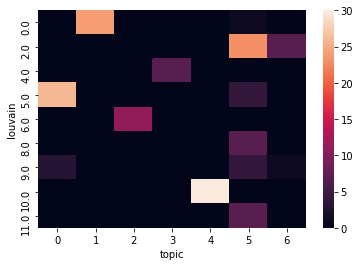

In [75]:
import seaborn as sns
sns.heatmap(pd.crosstab(union.louvain,union.topic), vmin=None, vmax=None, cmap=None, center=None, robust=False, annot=None, fmt='.2g', annot_kws=None, linewidths=0, linecolor='white', cbar=True, cbar_kws=None, cbar_ax=None, square=False, xticklabels='auto', yticklabels='auto', mask=None, ax=None)

In [84]:
cross = pd.crosstab(union.louvain,union.topic)

In [88]:
for community in cross.index:
    for top in cross.columns:
        if cross.loc[community,top] != 0:
            print( ' \n\n TOPIC',top,', community: ',community,'\n')
            for t in union[(union.topic==top)&(union.louvain==community)].title:
                print(t)

 

 TOPIC 1 , community:  0.0 

System, device, and method of visual login and stochastic cryptography 
Device, system, and method of detecting malicious automatic script and code injection 
Device, method, and system of detecting multiple users accessing the same account 
Device, system, and method of differentiating among users based on detection of hardware components 
Identification of computerized bots and automated cyber-attack modules 
System, method, and device of detecting identity of a user of an electronic device 
System, device, and method of detecting a remote access user 
System, device, and method of detecting identity of a user of an electronic device 
System, device, and method of recovery and resetting of user authentication factor 
Personalized inferred authentication for virtual assistance 
Device, system, and method of recovery and resetting of user authentication factor 
Device, system, and method of detecting multiple users accessing the same account 
Method and 

In [83]:
for t in union[(union.topic==4)&(union.louvain==10)].title:print(t)

Systems and methods for determining types of malware infections on computing devices 
Systems and methods for preventing data loss over virtualized networks 
Systems and methods for deploying applications included in application containers 
Systems and methods for replicating computing system environments 
Systems and methods for validating application signatures 
Systems and methods for protecting files from malicious encryption attempts 
Systems and methods for detecting malware using machine learning 
Systems and methods for performing security scans 
Systems and methods for replacing application methods at runtime 
Systems and methods for automated aggregation of information-source metadata 
Systems and methods for detecting malicious digitally-signed applications 
Systems and methods for detecting misplaced applications using functional categories 
Systems and methods for evaluating network security 
Systems and methods for blocking and removing internet-traversing malware 
System